In [25]:
%pylab inline
import terrainy
import geopandas as gpd
import pandas as pd
import shapely.geometry
import rasterio

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# High level api

<AxesSubplot:>

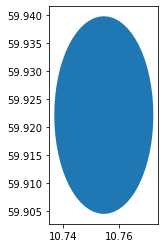

In [9]:
df = gpd.read_file("small.shp").to_crs("EPSG:4326")
df.plot()

In [28]:
terrainy.sources.load().head()

,country,type,resolution_m,crs_orig,connection_args,connection_type,source,layer,geometry
title,,,,,,,,,
Norway DTM,Norway,DTM,1.0,EPSG:25833,{'url': 'https://wcs.geonorge.no/skwms1/wcs.ho...,wcs,https://kartkatalog.geonorge.no/metadata/nasjo...,dtm_25833,"POLYGON ((9.66888 58.60331, 9.53165 58.52364, ..."
Norway DEM,Norway,DEM,1.0,EPSG:25833,{'url': 'https://wcs.geonorge.no/skwms1/wcs.ho...,wcs,https://kartkatalog.geonorge.no/metadata/nasjo...,dom_25833,"POLYGON ((9.66888 58.60331, 9.53165 58.52364, ..."
SRTM30_contour,None,None,NaN,EPSG:900913,{'url': 'https://ows.terrestris.de/osm/service?'},wms,None,SRTM30-Contour,None
SRTM30_colored_hillshade,None,None,NaN,EPSG:900913,{'url': 'https://ows.terrestris.de/osm/service?'},wms,None,SRTM30-Colored-Hillshade,"MULTIPOLYGON (((-175.78125 -44.33155, -176.132..."
SRTM30_hillshade,None,None,NaN,EPSG:900913,{'url': 'https://ows.terrestris.de/osm/service?'},wms,None,SRTM30-Hillshade,"MULTIPOLYGON (((-175.78125 -44.43160, -176.132..."


In [11]:
maps = terrainy.get_maps(df)
maps

,country,type,resolution_m,crs_orig,connection_args,connection_type,source,layer,geometry
title,,,,,,,,,
Norway DTM,Norway,DTM,1.0,EPSG:25833,{'url': 'https://wcs.geonorge.no/skwms1/wcs.ho...,wcs,https://kartkatalog.geonorge.no/metadata/nasjo...,dtm_25833,"POLYGON ((9.66888 58.60331, 9.53165 58.52364, ..."
Norway DEM,Norway,DEM,1.0,EPSG:25833,{'url': 'https://wcs.geonorge.no/skwms1/wcs.ho...,wcs,https://kartkatalog.geonorge.no/metadata/nasjo...,dom_25833,"POLYGON ((9.66888 58.60331, 9.53165 58.52364, ..."
topo4,None,None,NaN,EPSG:25833,{'url': 'https://openwms.statkart.no/skwms1/wm...,wms,None,topo4_WMS,"POLYGON ((27.66618 71.35554, 28.51360 71.29573..."
berggrunnn250,None,None,NaN,EPSG:25833,{'url': 'http://geo.ngu.no/mapserver/Berggrunn...,wms,None,Bergart_flate,"MULTIPOLYGON (((25.94084 57.96983, 25.81695 57..."
ign_source,None,None,NaN,3857,{'url': 'https://wxs.ign.fr/pratique/geoportai...,tile,None,None,"POLYGON ((180.00000 -85.05113, 180.00000 85.05..."
stamen_toner,None,None,NaN,3857,{'url': 'http://a.tile.stamen.com/toner/{z}/{x...,tile,None,None,"POLYGON ((180.00000 -85.05113, 180.00000 85.05..."
stamen_watercolor,None,None,NaN,3857,{'url': 'http://a.tile.stamen.com/watercolor/{...,tile,None,None,"POLYGON ((180.00000 -85.05113, 180.00000 85.05..."
stamen_terrain,None,None,NaN,3857,{'url': 'http://a.tile.stamen.com/terrain/{z}/...,tile,None,None,"POLYGON ((180.00000 -85.05113, 180.00000 85.05..."
gm_roadmap,None,None,NaN,3857,{'url': 'http://mt0.google.com/vt/lyrs=m&hl=en...,tile,None,None,"POLYGON ((180.00000 -85.05113, 180.00000 85.05..."


<AxesSubplot:>

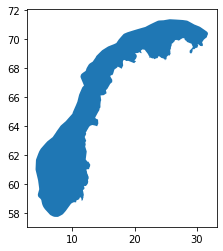

In [12]:
maps.loc[["Norway DEM"]].plot()

In [13]:
data_dict = terrainy.download(df, "Norway DTM", 1)

Working on block 1,1 of 2,4
Working on block 1,2 of 2,4
Working on block 1,3 of 2,4
Working on block 1,4 of 2,4
Working on block 2,1 of 2,4
Working on block 2,2 of 2,4
Working on block 2,3 of 2,4
Working on block 2,4 of 2,4


In [21]:
terrainy.export(data_dict, "small.tif", clip=True)

In [23]:
with rasterio.open("small.tif", "r") as src:
    image = {"data": src.meta,
     "transform": src.transform,
     "array": src.read()}
    

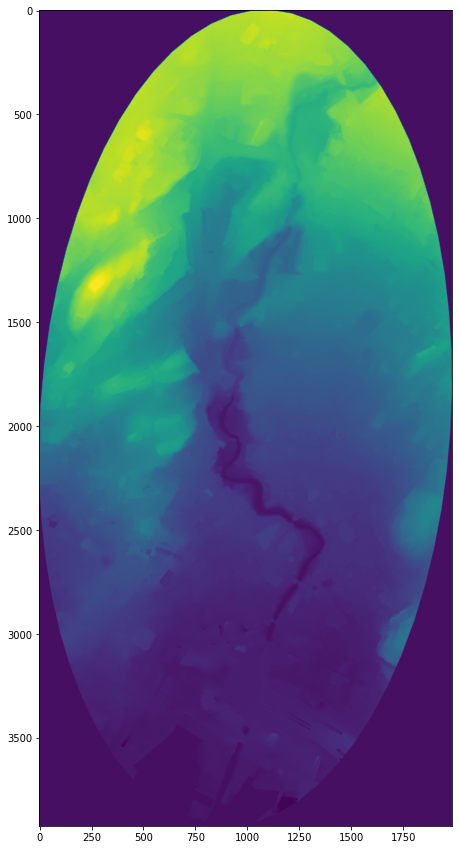

In [24]:
plt.figure(figsize=(15, 15))
plt.imshow(image["array"][0,:,:])
plt.show()

In [29]:
data_dict_img = terrainy.download(df, "berggrunnn250", 1)


Working on block 1,1 of 2,4
Working on block 1,2 of 2,4


/home/redhog/Projects/Emerald/terrainy/env/lib/python3.8/site-packages/rasterio-1.3a3-py3.8-linux-x86_64.egg/rasterio/io.py:137: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  return DatasetReader(mempath, driver=driver, sharing=sharing, **kwargs)


Working on block 1,3 of 2,4
Working on block 1,4 of 2,4
Working on block 2,1 of 2,4
Working on block 2,2 of 2,4
Working on block 2,3 of 2,4
Working on block 2,4 of 2,4


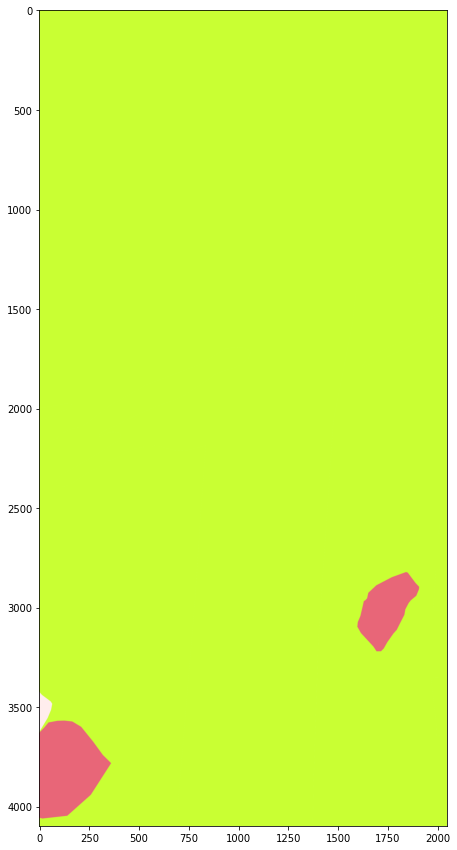

In [30]:
plt.figure(figsize=(15, 15))
plt.imshow(np.transpose(data_dict_img["array"], (1, 2, 0)))
plt.show()

In [38]:
terrainy.export(data_dict_img, "small_image.tif")

In [39]:
data_dict_img = terrainy.download(df, "gm_hybrid", 10)


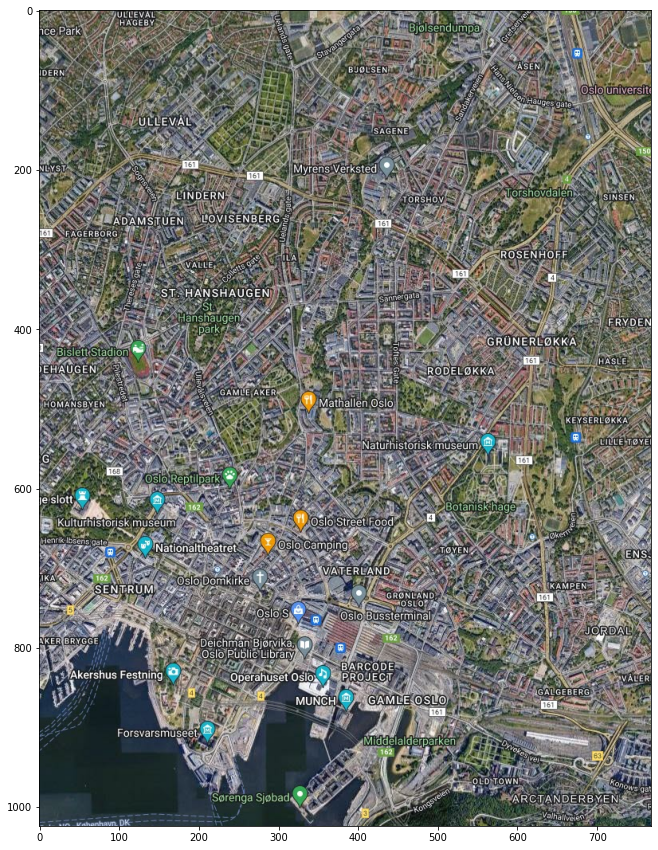

In [40]:
plt.figure(figsize=(15, 15))
plt.imshow(np.transpose(data_dict_img["array"], (1, 2, 0)))
plt.show()

# Low level api

In [8]:
con = terrainy.connection.connect(**data.loc["HR_losmasse"])

In [9]:
con.get_bounds()

(-284986.0, 7778140.0, 3675780.0, 11714100.0)

/home/redhog/Projects/Emerald/terrainy/env/lib/python3.8/site-packages/rasterio-1.3a3-py3.8-linux-x86_64.egg/rasterio/io.py:137: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  return DatasetReader(mempath, driver=driver, sharing=sharing, **kwargs)


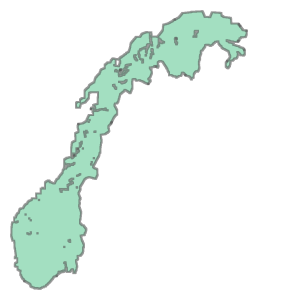

In [10]:
con.get_shape().geometry[0]

In [12]:
data_dict_img2 = con.download(df, 1)

Working on block 1,1 of 12,8
Working on block 1,2 of 12,8
Working on block 1,3 of 12,8
Working on block 1,4 of 12,8
Working on block 1,5 of 12,8
Working on block 1,6 of 12,8
Working on block 1,7 of 12,8
Working on block 1,8 of 12,8
Working on block 2,1 of 12,8
Working on block 2,2 of 12,8
Working on block 2,3 of 12,8
Working on block 2,4 of 12,8
Working on block 2,5 of 12,8
Working on block 2,6 of 12,8
Working on block 2,7 of 12,8
Working on block 2,8 of 12,8
Working on block 3,1 of 12,8
Working on block 3,2 of 12,8
Working on block 3,3 of 12,8
Working on block 3,4 of 12,8
Working on block 3,5 of 12,8
Working on block 3,6 of 12,8
Working on block 3,7 of 12,8
Working on block 3,8 of 12,8
Working on block 4,1 of 12,8
Working on block 4,2 of 12,8
Working on block 4,3 of 12,8
Working on block 4,4 of 12,8
Working on block 4,5 of 12,8
Working on block 4,6 of 12,8
Working on block 4,7 of 12,8
Working on block 4,8 of 12,8
Working on block 5,1 of 12,8
Working on block 5,2 of 12,8
Working on blo

ChunkedEncodingError: ("Connection broken: ConnectionResetError(104, 'Connection reset by peer')", ConnectionResetError(104, 'Connection reset by peer'))